## Fitting an exponential distribution to car intervals

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.gifmania.co.uk%2FVehicles-Animated-Gifs%2FAnimated-Cars%2FSports-Cars%2FRed-Porsche-911-54536.gif&f=1&nofb=1" alt="car">



I have collected the interval in seconds between cars in my road at a particular time window in seconds:

In [26]:
car<-c(10,35,10,35,49,10,3,31,6,22,0.5,9,34,17,11,52,49,10,3,
       28,5,53,58,19,2,128,40,43,6,7,12,41,29,12,126,
       18,15,47,43,65,41,5,1,13,6,20.7,70,59,35,34,23,1,25,
       7,1,72,3,17,30,28,84,13,42,2,33,9,197,99,46,8,21,
       56)
summary(car)
str(car)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.50    9.00   22.50   31.88   43.00  197.00 

 num [1:72] 10 35 10 35 49 10 3 31 6 22 ...


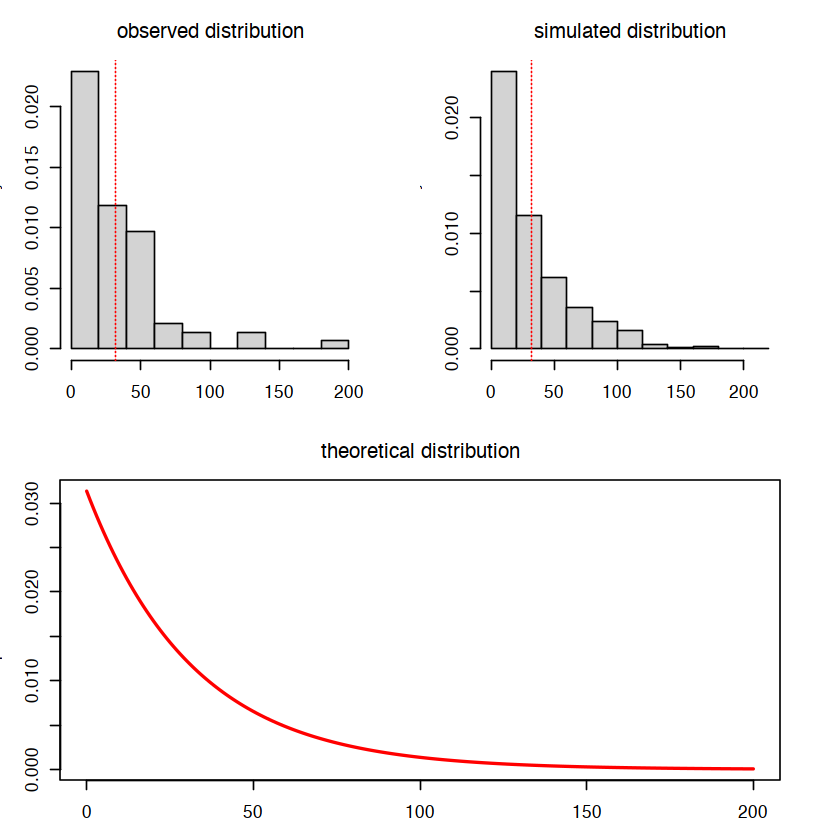

In [27]:
#prepare space for three figures:
#1 observed histogram distribution
#2 simulated histogram distribution based on observed mean (car rate)
#3 theoretical probability plot for a 200 seconds window based
#on observed main rate
par(mfrow=c(1,2))
par(mai=rep(0.5, 4))
layout(matrix(c(1,2,3,3), ncol = 2, byrow = TRUE))

hist(car,breaks = 10,prob=T,main = "observed distribution")
mean.int<-mean(car)
abline(v=mean.int,col="red",lty=3)#vertical line = mean interval

sim.int<-rexp(1000,1/mean.int)
hist(sim.int,breaks=10,prob=T,main="simulated distribution")
abline(v=mean.int,col="red",lty=3)


car.int <- seq(0, 200, by = 1)
prob.int <- dexp(car.int, rate = 1/1/mean.int)  
plot(car.int,prob.int,main="theoretical distribution",
     type="l",lwd=2,col="red",xlab="interval between cars")

In [28]:
pexp(10, rate=1/mean.int)#prob of one car showing up in a minute or less

[1] 0.2692604

In [29]:
dexp(120, rate=1/mean.int)#prob of next car passing later than in 2 minutes

[1] 0.000727216

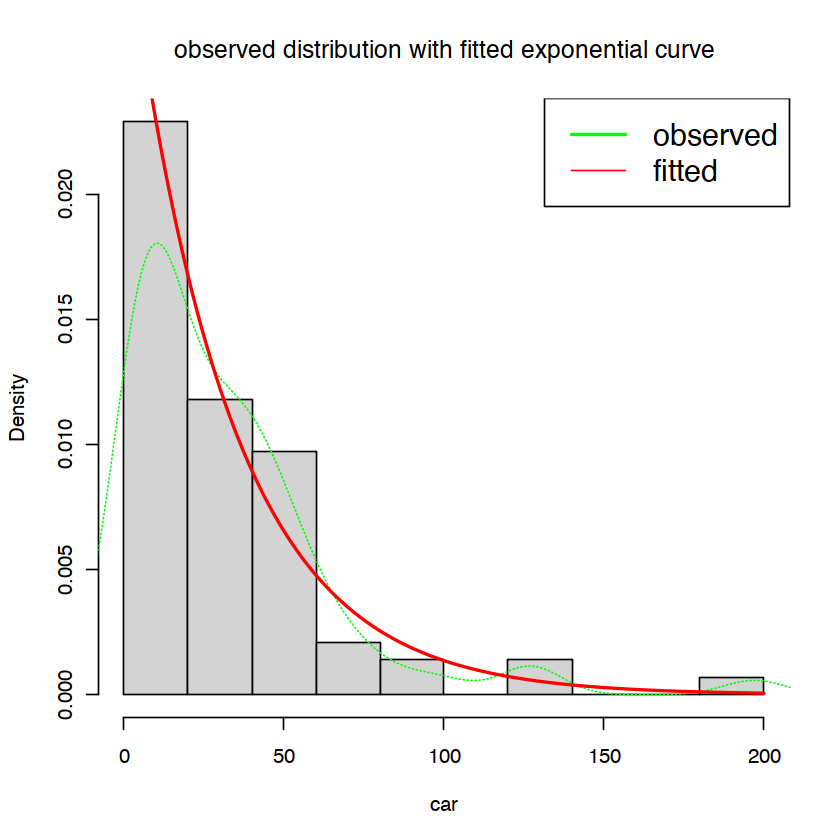

In [30]:
hist(car,breaks = 10,prob=T,main = "observed distribution with fitted exponential curve")
lines(density(car),lty=3,col="green")
lines(car.int,prob.int,lwd=2,col="red")
legend("topright", legend=c("observed", "fitted"),
       col=c("green", "red"), lwd=c(2,1), cex=1.5)

# Quiet versus busy road

In [31]:
#Tolosa hiribidea has much more traffic, but do car intervals still follow an exponential distribution?
tolosa<-c(.25,.8,2.3,.6,1.7,19,1.6,0.7,0.8,1.5,1.5,1.3,
          2.1,3.5,1.07,.6,.8,3.5,1.4,1,2.5,22,15,1.2,
          .7,4.4,.45,.8,2.2,.4,.4,.9,1.5,3.4,1.5,2.8,
          1,1,1,1,4,.4,1.3,0.4,2.4,2.5,.6,.6,.7,
          .6,.9,.9,.6,1.26,.6,.7,1.7,.4,2.5,2.8,2.2,
          39.7,.6,6.7,14.06,.7,.7,.9,2,3,.8,1,2,.43,
          .5,.4,1.1,.5,.6,.7,.6,0,1.1,.9,
          3.7,6.6,.7,3.9,0.9,30.3,4.4,1.9,
          3.1,1.9,3.3,2.9,.5,.6,5,3,3.5,.6,3.1,
          .6,.6,.8,2.3,1.7,.5,1.4,3.6,1.4,1,1.4,4.5,
          2.06,47.5,4.1,5.9,.7,1.5,2,.8,1.7,4.5,
          1.8,.49,.52,1,1.29,1.1,1,.47,.47,3.3,
          1.7,2,.66,.8,1.24,.79,41.79,.76,4.5)

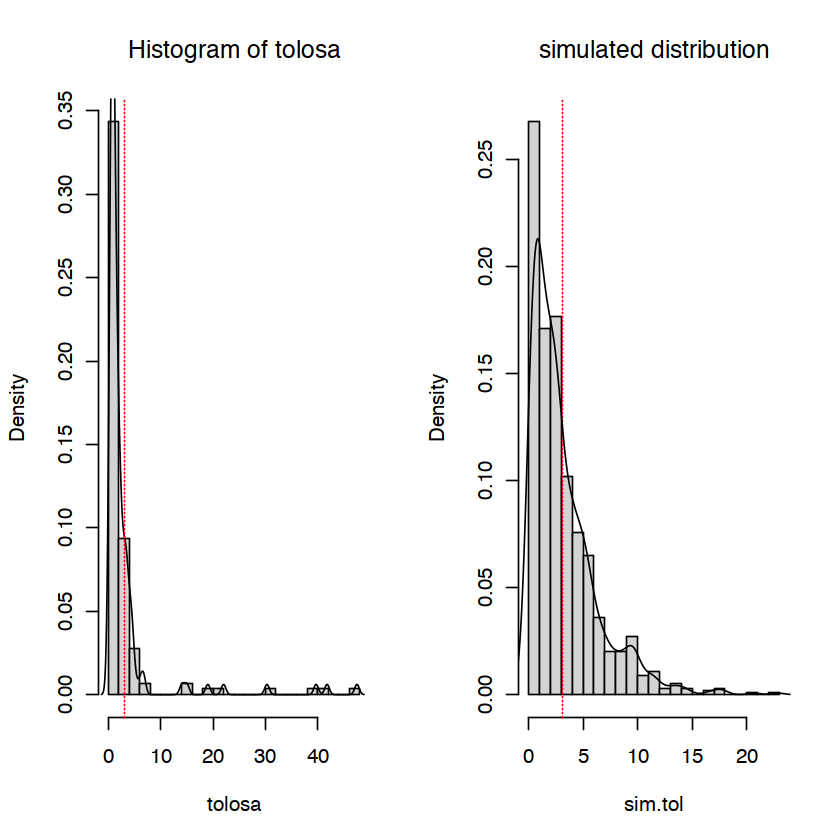

In [32]:
par(mfrow=c(1,2))
mean.tol<-mean(tolosa)
hist(tolosa,breaks=20,probability = T)
lines(density(tolosa))
abline(v=mean.tol,col="red",lty=3)
sim.tol<-rexp(1000,1/mean.tol)
hist(sim.tol,breaks=20,prob=T,main="simulated distribution")
abline(v=mean.tol,col="red",lty=3)
lines(density(sim.tol))

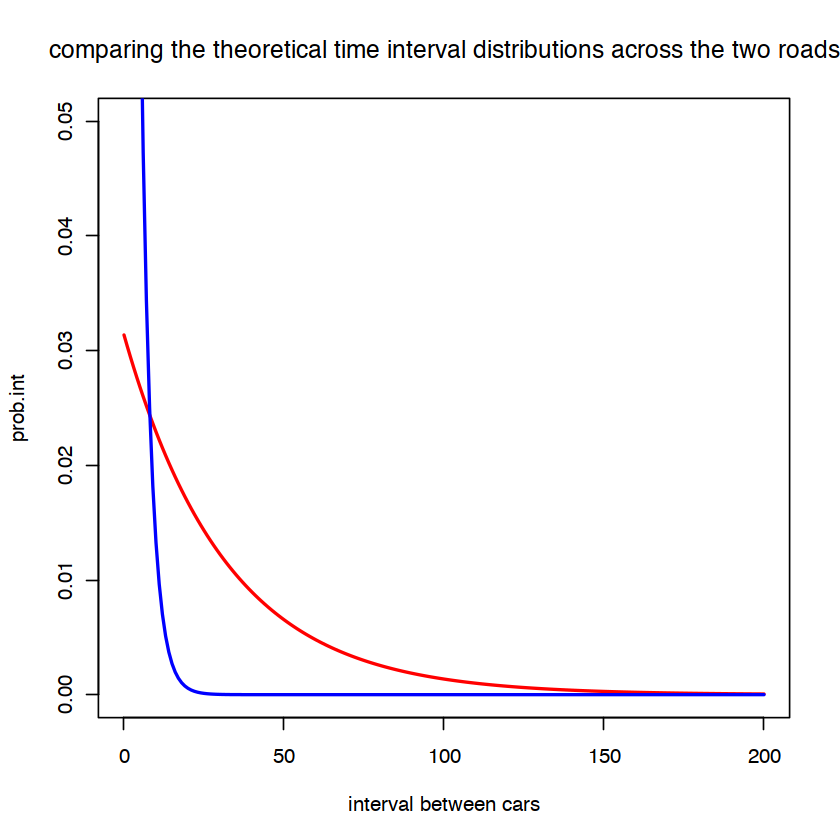

In [33]:
car.int <- seq(0, 200, by = 1)# Specify x-values 
#for exp function
#Now, we can apply the dexp function with a rate of 5 as follows:
prob.int <- dexp(car.int, rate = 1/1/mean.int)  
prob.int.tol<-dexp(car.int, rate = 1/1/mean.tol)  
plot(car.int,prob.int,main="comparing the theoretical time interval distributions across the two roads",
     type="l",lwd=2,col="red",xlab="interval between cars",
     ylim=c(0,0.05))
lines(car.int,prob.int.tol,
      type="l",lwd=2,col="blue")

## Interval between beer sips

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F66.media.tumblr.com%2Fd25f5d9a197eda0bca53d9012a10b199%2Ftumblr_pis783LCPS1xi271ho3_r1_400.gif&f=1&nofb=1" alt="car">

I have observed the interval between beer sips in a terrace of bar with 18 customers. Does the interval follow an exponential distribution?

In [34]:
sips<-c(46.7,1.5,17.7,12.6,1,23,29.8,22.2,11.57,12.14,15.5,23,4,54,19,47,25.9,30.7,22,43,8.8,1.48,20,15,18.5,
31,15,10,8.4,5,5.8,12,8.9,31)
summary(sips)
str(sips)
int.sip<-mean(sips)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   9.175  16.600  19.211  25.175  54.000 

 num [1:34] 46.7 1.5 17.7 12.6 1 ...


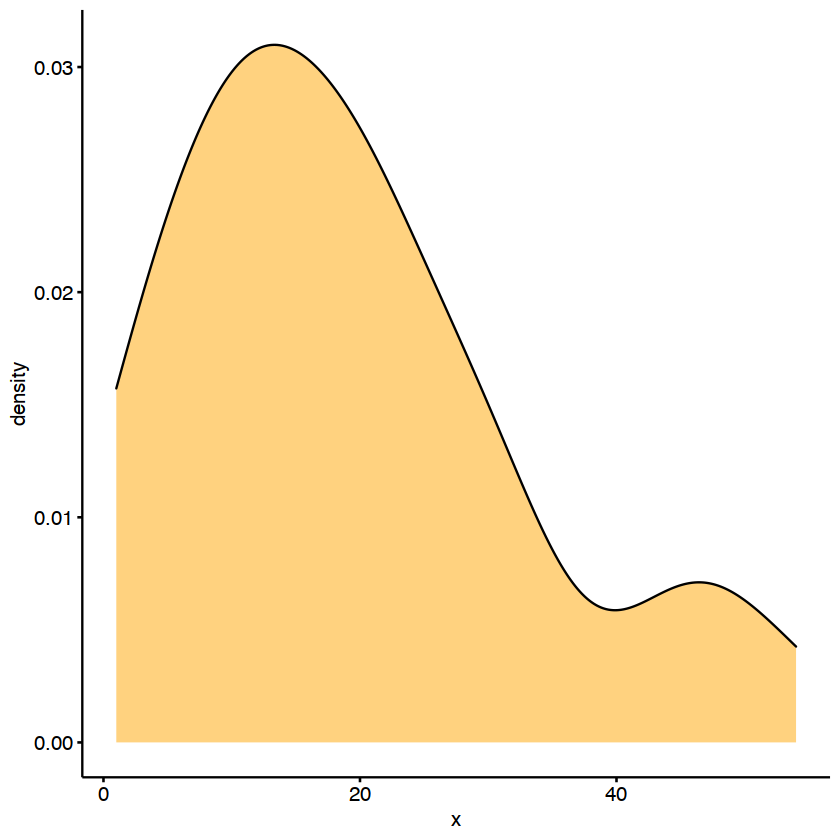

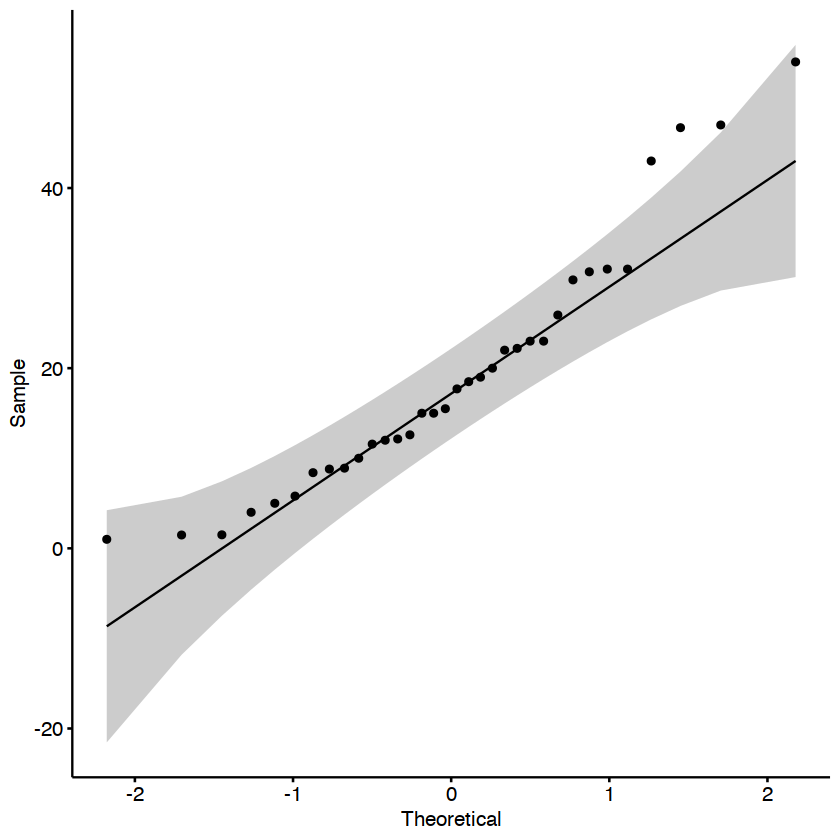

In [35]:
library("ggpubr")
par(mfrow=c(1,2))
# Density plot
ggdensity(sips, fill = "orange")
# QQ plot
ggqqplot(sips)
#hum, it is right normal skewed or exponential?

In [36]:
shapiro.test(sips)#not normal


	Shapiro-Wilk normality test

data:  sips
W = 0.92423, p-value = 0.02132


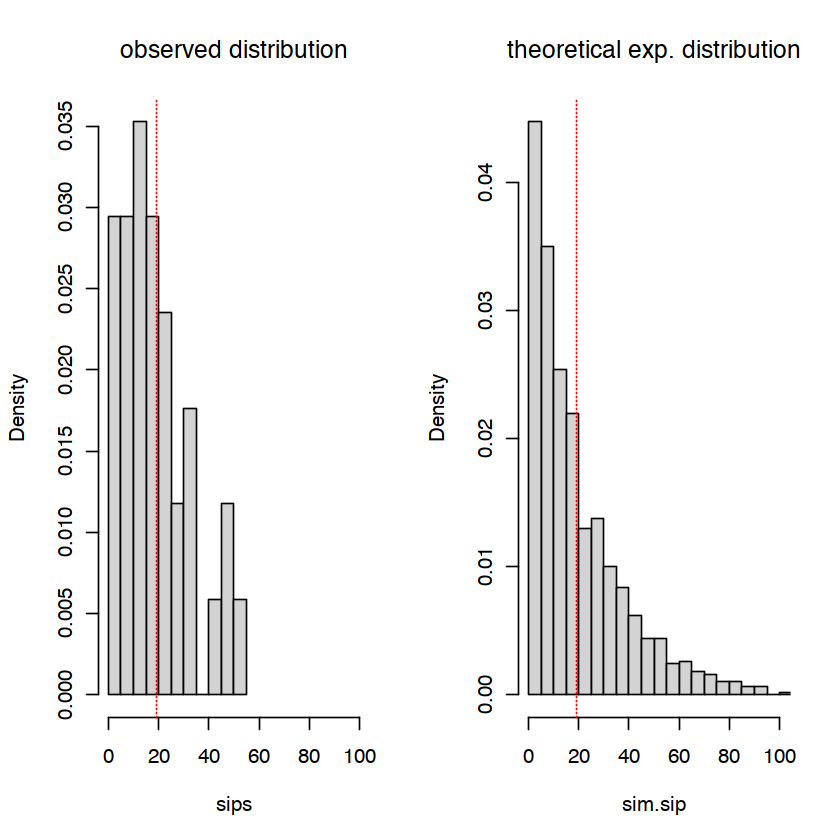

In [37]:
par(mfrow=c(1,2))
hist(sips,breaks = 10,prob=T,main = "observed distribution",xlim = c(0,100))
abline(v=int.sip,col="red",lty=3)#vertical line = mean interval

sim.sip<-rexp(1000,1/int.sip)
hist(sim.sip,breaks = 30,prob=T,main = "theoretical exp. distribution",xlim = c(0,100))
abline(v=int.sip,col="red",lty=3)#vertical line = mean interval
#hum, not really, perhaps not enough data

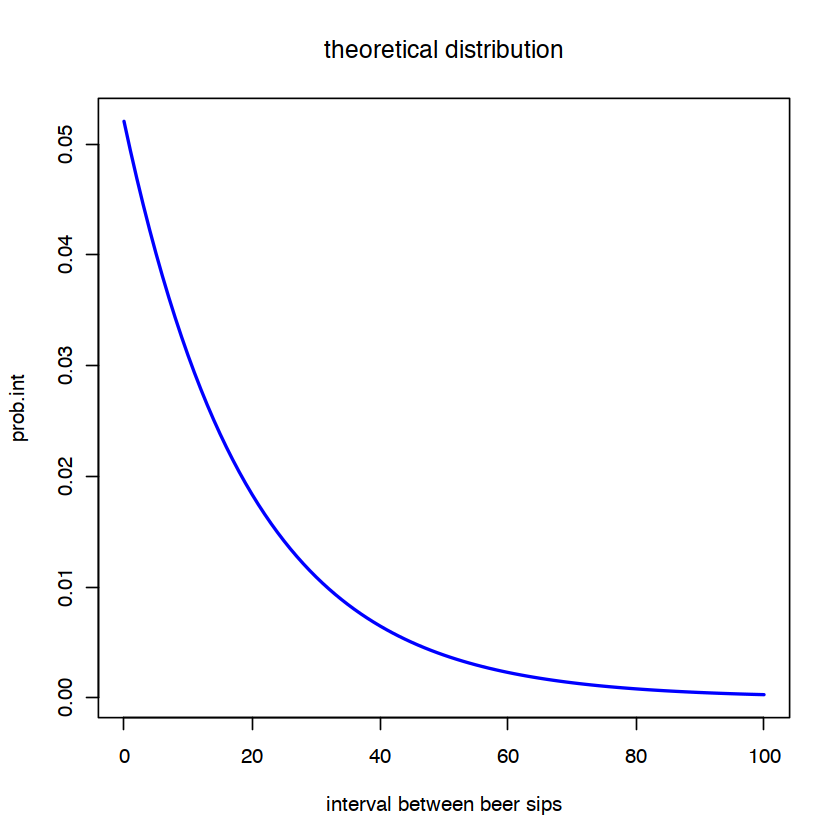

In [38]:
sip.100 <- seq(0, 100, by = 1)
prob.int <- dexp(sip.100, rate = 1/int.sip)  
plot(sip.100,prob.int,main="theoretical distribution",
     type="l",lwd=2,col="blue",xlab="interval between beer sips")

In [39]:
wilcox.test(sim.sip,sips)#is this proof of exponential?


	Wilcoxon rank sum test with continuity correction

data:  sim.sip and sips
W = 15666, p-value = 0.4362
alternative hypothesis: true location shift is not equal to 0


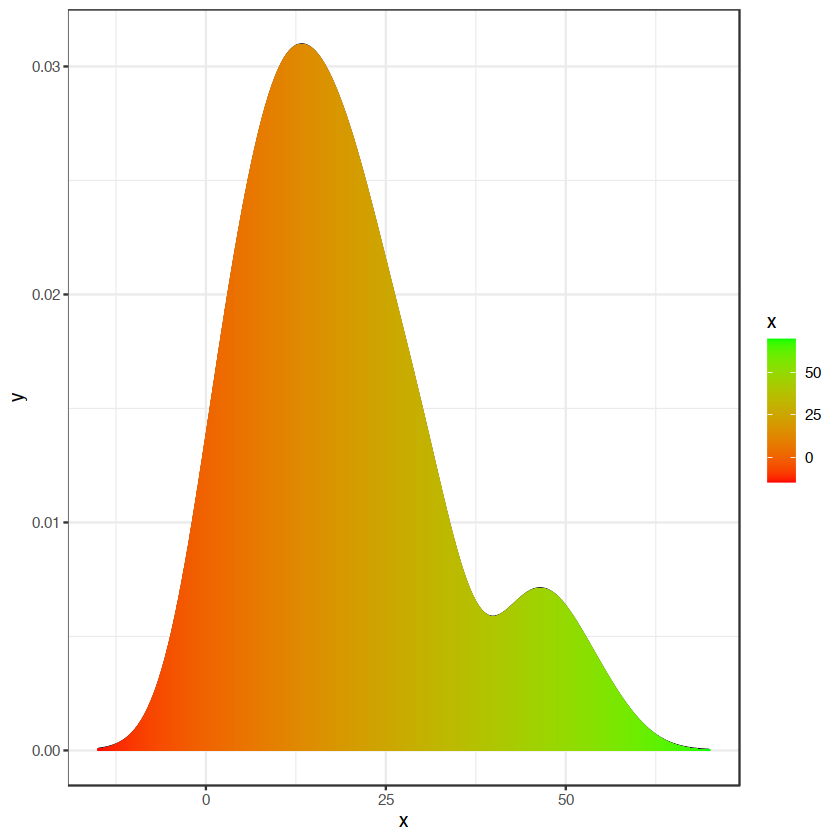

In [40]:
x <- sips
y <- density(x, n = 2^12)
ggplot(data.frame(x = y$x, y = y$y), aes(x, y)) + geom_line() + 
  geom_segment(aes(xend = x, yend = 0, colour = x)) + 
  scale_color_gradient(low = 'red', high = 'green')+theme_bw()